# spt-PALM ParB proteins
## aims
In this tutorial you will :



1.   Read tutorials on Single Particle Tracking (SPT)
2.   Answer questionnaire
Load tracking data for ParB and plot diffusion coefficient distributions. Identify species.
3. Run module to 
  - visualize diffusion coefficient distributions of ParB proteins from Escherichia coli F plasmid
  - extract populations diffusion coefficients
  - find out what the mutants are doing
4. Simulate single particle tracks
5. Further reading







## 0 - Preliminary reading


Make sure you are confortable with the following concepts, otherwise follow the link.
- Bacterial chromosome organisation
- Single molecule imaging



## 1 - Single Particle Tracking (SPT)


- [abbelight](https://www.abbelight.com/single-particle-tracking/)
- [oni](https://oni.bio/nanoimager/super-resolution-microscopy/single-particle-tracking/)
- [Mean Squared Displacement](https://www.youtube.com/watch?v=yZ7zHg7goBc&ab_channel=ES.333)
- [Don Lamb](https://www.labtube.tv/video/MTA0NTc3) : The first 12 minutes.
- [Single particle tracking course](https://drive.google.com/file/d/1uJ6f_jkbtgy5-HUin7Nrm-L_75TIMl4c/view?usp=sharing)


*italicized text*

## 2 - Questionnaire



- What is single particle tracking?
- What advantages bring single molecule tracking over FRAP or FCS?
- What is Brownian motion?
- What is a diffusion coefficient? What parameters does it depend on?
- What is Mean Squared Displacement (MSD)? How is it calculated? How does it look for :
  - a directed motion?
  - a brownian motion?
  - a confined motion?

## 3- Construct


### Import Libraries

In [4]:
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline
from pylab import *
from scipy.optimize import curve_fit
import pandas as pd


### Preamble

**Exercice #1**

Calculate the diffusion time of a GFP in water

- GFP Radius = 2.4 nm
- viscosity of water = 10**-3  in SI units (Pascal-seconds)
- Boltzmann constant = 1.38*10**-23  m2 kg s-2 K-1
- Temperature = 293  Kelvin

**Exercice #2**

Calculate the viscosity of E.coli/HeLa cell cytoplasm if the measured diffusion coefficient of a GFP is 7 µm²/s and 30 µm²/s respectively.

**Exercice #3**

How long would it take for a GFP protein to diffuse across :
- an E.coli cell (R = 1 µm)
- an HeLa cell (R = 20 µm)
- a neuronal cell axon (R = 1 cm)

In [4]:
print('\n ==== Exercice #1 : use Stokes-Einstein equation ====')

R = 2.4*10**-9  # GFP Radius in meters
eta_water = 10**-3  # viscosity of water in SI units (Pascal-seconds)
kB = 1.38*10**-23  # Boltzmann constant
T = 293  #Temperature in degrees Kelvin
D_water = kB*T/(6*3.14*eta_water*R)*10**12
print('GFP diffusion coefficient in water = ', round(D_water,2), ' µm²/s')


print('\n ==== Exercice #2 : use Stokes-Einstein equation ====')
D_EC = 10 #µm²/s
eta_EC = kB*T/(D_EC*10**-12*6*3.14*R)
print('Escherichia coli cytoplasm viscosity = ', round(eta_EC,4), ' Pascal-seconds')
D_HL = 30 #µm²/s
eta_HL = kB*T/(D_HL*10**-12*6*3.14*R)
print('Escherichia coli cytoplasm viscosity = ', round(eta_HL,4), ' Pascal-seconds')

print('\n ==== Exercice #3 : use Mean Squared Displacement formula ====')
R_EC = 1 #µm
print('Time to diffuse across EC = ', round(R_EC**2/(6*D_EC)*10**3,2), ' Milliseconds')
R_HL = 20 #µm
print('Time to diffuse across EC = ', round(R_HL**2/(6*D_HL),2), ' Seconds')
R_NA = 10**4 #µm
print('Time to diffuse across EC = ', round(R_NA**2/(6*D_HL)/3600/24,2), ' Days !')


 ==== Exercice #1 : use Stokes-Einstein equation ====
GFP diffusion coefficient in water =  89.42  µm²/s

 ==== Exercice #2 : use Stokes-Einstein equation ====
Escherichia coli cytoplasm viscosity =  0.0089  Pascal-seconds
Escherichia coli cytoplasm viscosity =  0.003  Pascal-seconds

 ==== Exercice #3 : use Mean Squared Displacement formula ====
Time to diffuse across EC =  16.67  Milliseconds
Time to diffuse across EC =  2.22  Seconds
Time to diffuse across EC =  6.43  Days !


### A practical case : experimental data on ParB single proteins in Escherichia coli
### Bacterial partition systems
The preservation of all living forms relies on the faithful
segregation of their duplicated genetic material upon cell
division. To assure the relocalization of replicated DNA,
prokaryotic organisms have evolved dedicated apparatuses,
namely partition systems (Par). The ParABS system contains three essential
elements: a repeat of centromere-like DNA sequences (parS), a
DNA-binding protein (ParB) and a deviant Walker A-type
ATPase (ParA). ParB specifically recognizes parS and, upon
binding, forms the partition complex (ParBS) that will be
displaced by the action of ParA.

Here you will explore the dynamic properties of single ParB proteins from the ParABS system of the F-plasmid in Escherichia coli. Single ParB molecules were imaged in live cells using single-particle tracking PALM (spt-PALM). Wild-type and ParB mutants were labelled with the photo-activatable fluorescent protein mEos2 and the diffusion coefficients of single ParB protein were computed from the mean-squared displacement of individual trajectories.


### Load the data
### Mount Drive to access ParB diffusion coefficients data
To load an image in Google Colab from your google drive :
-  Mount your google drive (drive folder icon in the left menu of Google colab) or simply run the cell block below.
    - This needs to be done only once as the notebook will remember this step.
-  Navigate to the file to be loaded. Right click on it and "copy path"
-  Use this path to load the file within google Colab.



In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [5]:
# Load Wild type ParB diffusion coefficients
filename = '/content/drive/MyDrive/data/ParB_Diff_Coeff_WT'
D_WT = np.loadtxt(filename) 
D_WT_name = os.path.splitext(os.path.basename(filename))[0]
print(str(D_WT_name) + ' matrix shape :'  + str(D_WT.shape))

# Load ParB mutant diffusion coefficients
filename = '/content/drive/MyDrive/data/ParB_Diff_Coeff_parSmut'
D_parSmut = np.loadtxt(filename) 
D_parSmut_name = os.path.splitext(os.path.basename(filename))[0]
print(str(D_parSmut_name) + ' matrix original shape :'  + str(D_parSmut.shape))

ParB_Diff_Coeff_WT matrix shape :(30835,)
ParB_Diff_Coeff_parSmut matrix original shape :(53287,)


### Plot the results

Text(0.5, 1.0, 'Distributions of single molecule ParB diffusion coefficients')

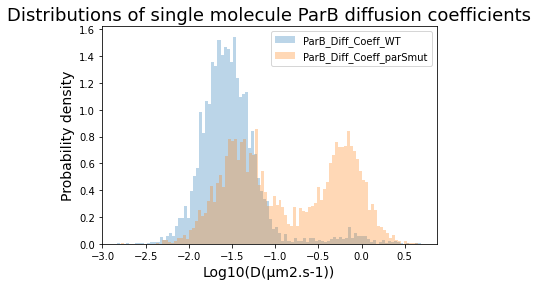

In [158]:
kwargs = dict(histtype='stepfilled', density=True, alpha=0.3, bins=100)

plt.hist(np.log10(D_WT), **kwargs);
plt.hist(np.log10(D_parSmut), **kwargs);
plt.legend([D_WT_name,D_parSmut_name ])
plt.xlabel('Log10(D(µm2.s-1))', FontSize = 14)
plt.ylabel('Probability density', FontSize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', FontSize = 18)

### Questions
- How many populations do you see for each experiment?
- How do the diffusion coefficients of ParB compare with the ones of a free GFP diffusing in water or in Escherichia coli cytoplasm?
    - Give an explanation.
- What happens in the mutant where ParB cannot bind to its recognition sequence parS?
    - Try giving an explanation for the two populations observed.

### Extract populations diffusion coefficient

In [9]:
# Define functions to fit the data
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

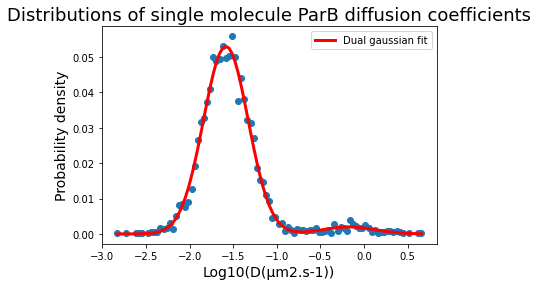


 FITTING RESULTS:
 
                  mu     sigma         A
Population                              
1          -1.584591  0.256165  0.053008
2          -0.172870  0.299697  0.001974


In [160]:
# Compute normalized histograms (sum of bins = 1)
bins = np.linspace(np.log10(D_WT).min(),np.log10(D_WT).max(), 100) # Linear spacing of bins in log space
widths = (bins[1:] - bins[:-1]) # set uniform bin size
histo = np.histogram(np.log10(D_WT), bins=bins, density=True)
histo_norm = histo[0]
histo_norm = histo_norm / histo_norm.sum() # normlize histogram

x = bins[:-1]
y = histo_norm
x = x[np.nonzero(y)]
y = y[np.nonzero(y)]

plt.scatter(x, y)

# Fit the histogram with custom Gaussian function
expected=(-1.5,.2,0.06,-0.2,.2,0.01)
params,cov=curve_fit(bimodal, x, y, expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='Dual gaussian fit')
legend()
plt.xlabel('Log10(D(µm2.s-1))', FontSize = 14)
plt.ylabel('Probability density', FontSize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', FontSize = 18)
plt.show()

# Format fitting results into dataframe to display
df1 = pd.DataFrame([params[0:3]],columns=list(['mu','sigma','A']))
df2 = pd.DataFrame([params[3:6]], columns=list(['mu','sigma','A']))
df = pd.concat([df1, df2], ignore_index=True)
df.index = ['1', '2']
df.index.name="Population"
print('\n FITTING RESULTS:\n ')
print(df)  


### Questions:
- Give the diffusion coefficients of each population in µm²/sec.
- Calculate the fraction each population represents?

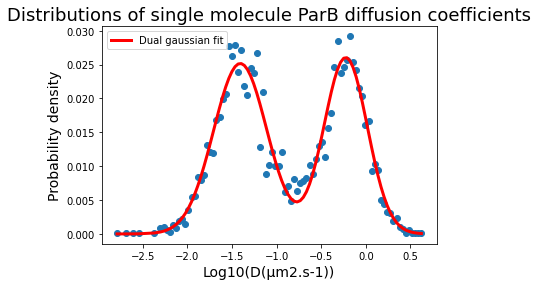


 FITTING RESULTS:
 
                  mu     sigma         A
Population                              
1          -1.407169  0.299094  0.025166
2          -0.225165  0.243259  0.026037


In [161]:

# Compute normalized histograms (sum of bins = 1)
bins = np.linspace(np.log10(D_parSmut).min(),np.log10(D_parSmut).max(), 100) # Linear spacing of bins in log space
widths = (bins[1:] - bins[:-1]) # set uniform bin size
histo = np.histogram(np.log10(D_parSmut), bins=bins, density=True)
histo_norm = histo[0]
histo_norm = histo_norm / histo_norm.sum() # normlize histogram

x = bins[:-1]
y = histo_norm
x = x[np.nonzero(y)]
y = y[np.nonzero(y)]

plt.scatter(x, y)

# Fit the histogram with custom Gaussian function
expected=(-1.5,.2,0.06,-0.2,.2,0.01)
params,cov=curve_fit(bimodal, x, y, expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='Dual gaussian fit')
legend()
plt.xlabel('Log10(D(µm2.s-1))', FontSize = 14)
plt.ylabel('Probability density', FontSize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', FontSize = 18)
plt.show()

# Format fitting results into dataframe to display
df1 = pd.DataFrame([params[0:3]],columns=list(['mu','sigma','A']))
df2 = pd.DataFrame([params[3:6]], columns=list(['mu','sigma','A']))
df = pd.concat([df1, df2], ignore_index=True)
df.index = ['1', '2']
df.index.name="Population"
print('\n FITTING RESULTS:\n ')
print(df)  

### Questions:
- Give the diffusion coefficients of each population in µm²/sec.
- Calculate the fraction each population represents?

## 4- Simulate single particle tracks

### Advanced

Simulate single molecule tracks with similar diffusion coefficients

Text(0, 0.5, 'Y, µm²/sec')

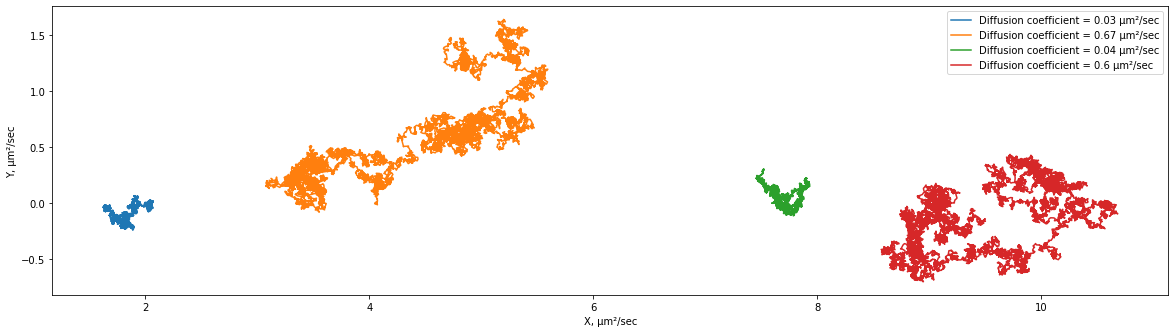

In [164]:
# Input parameters
n = 10**4 # number of steps
# D = [1, 0.5, 0.1, 0.01] # µm²/sec
D = [10**-1.584591 , 10**-0.172870, 10**-1.407169, 10**-0.225165] # Diffusion coefficients, µm²/sec
dT = 10**-4 # sec

# Init tracks coordinates
xx = np.zeros([n, len(D)])
yy = np.zeros([n, len(D)])

# Fill tracks coordinates
for t in range(0, len(D)):        # For each track (size of D)
  xx[0,t] = xx[:,t-1].max() +2    # Shift new track to avoid overlap
  for i in range(1, n):
    step = np.sqrt(2*D[t]*dT)
    xx[i,t] = xx[i-1,t] + step*np.random.randn()
    yy[i,t] = yy[i-1,t] + step*np.random.randn()

# Display results
plt.figure(figsize=(20,10))
plt.plot(xx,yy)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(["Diffusion coefficient = " + s + " µm²/sec" for s in [str(round(x, 2)) for x in D] ])
plt.xlabel("X, µm²/sec")
plt.ylabel("Y, µm²/sec")

### To go further
- Compute the step size distribution of each simulated track.
- Compute the Mean Squared Displacement of each simulated track.

## 5- Further reading



- [A review of progress in single particle tracking: from methods to biophysical insights](https://iopscience.iop.org/article/10.1088/0034-4885/78/12/124601)